<a href="https://colab.research.google.com/github/deviandinifebrianti/PCVK_Genap_2023/blob/main/Jobsheet%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 9

Nama Anggota Kelompok
1. ADINDA WAHYU LUCHMANSYAHVIRA (03 - 2141720096)
2. BAGUS REZKY ADHYAKSA (07 - 2141720210)
3. DEVI ANDINI FEBRIANTI (09 - 2141720189)



```
1. Gamma Correction
```



 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


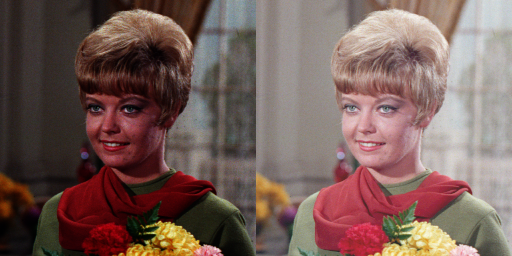

In [10]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

if original is None:
    print(f'File not found: {original}')
    exit()

# Normalisasi nilai piksel menjadi rentang [0, 1]
normalized_original = original / 255.0

# Aplikasikan gamma correction
gamma_img = np.zeros_like(original, dtype=np.uint8)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            gamma_img[y, x, c] = np.clip(255 * pow((normalized_original[y, x, c]), (1 / gamma)), 0, 255)


# Gabungkan gambar asli dan hasil gamma correction
final_frame = np.hstack((original, gamma_img))

# Tampilkan gambar
cv2_imshow(final_frame)



```
2. Image Depth
```



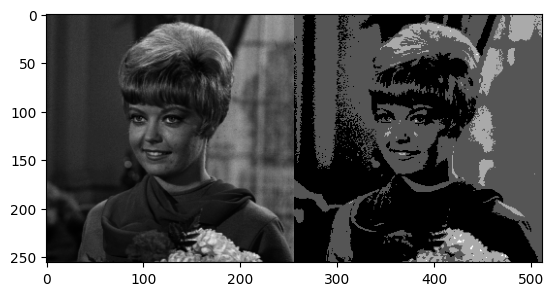

In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, np.uint8)

for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i,j] = np.clip(round(original[i,j]/level), 0, 255) * level

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')
plt.show()



```
3. Average Denoising
```



In [62]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import glob

# Membaca citra asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/noise/galaxy.jpg')

In [66]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

img_asli = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n= cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlahGambar = 20
for i in range(jumlahGambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlahGambar)

psnr = PSNR(img_asli,denoised_image)

print('nilai psnr-nya adalah: ',psnr,' dB')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image) cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/noise/galaxy.jpg')
cv_img = [0]
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

SyntaxError: ignored



```
4. Image Masking
```



In [53]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import glob

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK/KTP.jpg')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (670, 230), 20, (255,255,255), thickness=-5)

# menggunakan bitwise 'NAND' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = couple_image & mask

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

AttributeError: ignored



```
5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.
```



In [54]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io
import glob

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/KTP.jpg')

# Menentukan pusat dan jari-jari lingkaran
center = (670, 210)  # (x, y) coordinates of the center of the first circle
radius = 90

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pada mask
cv2.circle(mask, center, radius, (255, 255, 255), thickness=-1)  # White circle on black background

result = ~original_image & ~mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

org_frame = cv.hconcat((original_image, mask, result))
cv2_imshow(org_frame)

AttributeError: ignored